# Keywords Script:

* Wiederholen Sie die aus dem PGP1 bekannten Konzepte:
    * Messunsicherheiten (Messfehler), statistische und systematische Unsicherheit
    * Korrelation und Antikorrelation
    * Gaussverteilung (Normalverteilung)
    * Arithmetisches Mittel und Standardabweichung
    * Zentraler Grenzwertsatz
    * Wahrscheinlichkeitsverteilung
* Binominal-Verteilung
* Poisson-Verteilung
* Wahrscheinlichkeitsdichte-Funktion
* kumulative Wahrscheinlichkeits-Funktion


# Aufgaben zur Vorbereitung:


* Verknüpfen des Zentralengrenzwertsatzs, der Normalverteilung und des arithmetischen Mittels (in Python):
    1. Nimm random nicht Gaußverteilung, e.g., exponential decay
    2. Plotte Zerfallsverteilung.
    3. Ziehe 2, 5, 10, 100 verschieden "Messungen"
    4. Berechne Mittelwert von "gemessenen" Werten und plotte

In [480]:
# import matplotlib.pyplot as plt
# import numpy as np

# import iminuit

# print(iminuit.__version__)

In [481]:
# # Truth
# R = 10*10**3  # Ohm
# C = 10*10**-6  # F
# I0 = 10/R

# def discharge_current(t, I0, R, C):
#     return I0 * np.exp(-t/(R*C))


# time_truth = np.arange(0, 1, 0.1)


# # Make psuedo measured values:
# sigma_time = 0.02
# dtime = np.random.normal(0, sigma_time, len(time_truth))
# time_mess = time_truth + dtime

# sigma_current = 0.05
# current_truth = discharge_current(time_truth, I0, R, C)/10**-3
# current_mes = current_truth + np.random.normal(0, sigma_current, len(current_truth))


In [482]:
# import pandas as pd
# df = pd.DataFrame()
# df['time'] = time_mess
# df['current'] = current_mes
# df['delta_current'] = sigma_current
# df['delta_time'] = np.abs(dtime)

In [483]:
# df.to_csv('data/discharge_data.csv')

In [484]:
# plt.plot(time_truth, discharge_current(time_truth, I0, R, C)/10**-3, marker='.')
# plt.errorbar(time_mess, current_mes, xerr=sigma_time, yerr=np.abs(sigma_current), ls='', marker='.')
# plt.ylabel('Current [mA]')
# plt.xlabel('Time [s]')
# plt.show()

# Methode der kleinsten Quadrate

Im folgenden wollen wir die **Methode der kleinsten Quadrate (Least Squares)** näher beleuchten. Diese Methode wird oft benutzt, um eine Funktion $\lambda(x; \ $**$\phi$**$)$ mit den Funktionsparametern $\mathbf{\phi}$ an die gemessenen Punkte **$(x,y)$** anzupassen. Um jedoch die **Methode der kleinsten Quadrate** zu verstehen, wollen wir sie erst einmal anschaulich und halb-mathematisch herleiten. Dabei stüzen wir uns im Folgenden auf eine Herleitung aus dem Buch **"Statistical Data Analysis"**  von **Glen Cowan**.

Bevor wir dies jedoch tun, schauen wir uns das Problem des Fittens doch erst einmal anschaulich an. 

<figure class="image">
<img src="images/SketchLeastSquares.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>

Beim Fitten, zum Beispiel einer Geraden (lila) an eine Reihe von Messpunkten (schwarz), wollen wir den Abstand zwischen den einzelnen Messpunkten und der Geraden (orange) möglichst klein halten. Sprich die Summe über alle $\Delta Y_i$ 

$$\sum_i \Delta Y_i $$

sollte möglichst klein sein, wobei $\Delta Y_i$ durch 

$$ \Delta Y_i = y_i – f(x_i, \vec{\theta})$$

gegeben ist und $f(x, \vec{\theta})$ unsere Fitfunktion repräsentiert. Hierbei symbolisiert $\vec{\theta}$ die Parameter unserer Funktion. Sprich im Fall einer Geraden die Steigung $m$ und den Offset $y_0$ ($\vec{\theta}=(m, y_0)$). 

Darüber hinaus sollte die Richtung des Abstandes, sprich ob ein Messpunkt unterhalb oder oberhalb der Fitfunktion liegt, keine Rolle spielen. Daher quadrieren wir das Ganze und erhalten somit

$$ LS = \sum_i = (y_i – f(x_i, \theta))^2$$

Dies ist die allgemeinste Form der Methode der kleinsten Quadrate. Sie besagt, dass die Funktion, welche die Messpunkte am besten beschreibt, sprich die optimalen Werte für $\vec{\theta}$ aufweist, den Ausdruck LS minimiert. 

Nun weisen unsere Messpunkte nicht nur Werte für X und Y aus, sondern sind noch zusätzlich durch einen Messunsicherheit (Messfehler) charakterisiert. Diese sollten wir natürlich bei der Bestimmung unserer Parameter $\vec{\theta}$ berücksichtigen. Sprich Messwerte mit einer großen Unsicherheit sollten weniger stark berücksichtigt werden wie Messwerte mit einer kleinen Unsicherheit. Dies können wir gewährleisten, sofern wir die Distanzen $\Delta Y_i$ mit den jeweiligen Unsicherheiten $\Delta y_i$ gewichten, sprich  

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

berechnen. Das Quadrieren der Unsicherheiten sorgt dafür, dass der Ausdruck dimensionslos wird. Diese besondere Form der kleinsten Quadrate nennt man auch oft $\chi^2$-Fit. Wir werden später noch einmal genauer beleuchten warum. 

Nun wollen wir uns erst einmal ein Beispiel anschauen, wie dies in der Praxis aussieht. In der nachfolgenden Animation wird ein Ohm’schwer Widerstand an eine Reihe von Spannungs- und Strommessungen gefittet. Dies entspricht unserem obigen Geradenbeispiel. 
<figure class="image">
<img src="images/MaterialPythonkurs092018/Fitting_gif.gif"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Wie die Animation zeigt, werden so lange verschiedene Widerstände ausprobiert, bis ein Wert gefunden wurde, bei dem das $\chi^2$ minimal wird. Dieses Variieren der Widerstandswerte passiert nicht zufällig, sondern basiert auf einem Algorithmus für Optimierungsverfahren. 

Es gibt verschiedene Arten von Algorithmen, um Minimierungsprobleme zu lösen. Wie diese genau aufgebaut sind, lernen Sie in anderen Programmierveranstaltungen, wie zum Beispiel *Programmieren für Physiker* oder *Computer in der Wissenschaft*. Zum Glück haben uns in Python bereits andere Menschen diese Arbeit abgenommen. Im folgenden wollen wir uns das package `iminuit` etwas genauer anschauen, welches bereits ein sehr umfangreiches und mächtiges Fittingtool darstellt. 

[iminuit](https://iminuit.readthedocs.io/en/stable/tutorials.html) verfügt auch über eine exzellente Dokumentation, mit Hilfe derer Sie auch komplexere Probleme lösen können.

Um mit Hilfe von `imnuit` etwas zu fitten brauchen wir zunächst einmal ein paar Messdaten und ein Fitmodel. Im Folgenden wollen wir die Entladekurve eines Kondensators mit der Kapazität $C$ über einen Widerstand $R$ bestimmen. Die Entladekurve ist durch eine einfache Exponentialfunktion der Form 

$$ I = I_0 \exp\{-t/RC\}$$

gegeben. Die Messdaten befinden sich in einer CSV-Datei im Ordner `data`. Die CSV-Datei kann mit Hilfe des `pandas` package eingelesen werden. [pandas](https://pandas.pydata.org/) ist ähnlich wie `numpy` ein package welches eine Fülle an Funktionen zum Verarbeiten und Verwalten von Daten bereitstellt. Es gehört ähnlich wie auch `numpy`, `scipy` und `matplotlib` zu den Standardbibliotheken, welche sehr häufig in der Wissenschaft verwendet werden. Aufgrund der zeitlichen Limitierung des Versuchstages können wir leider nicht auf alle Funktionen von `pandas` eingehen und wollen uns im Folgenden lediglich auf die Grundlagen beschränken. Für ihre zukünftigen Praktika lohnt es sich jedoch, noch mehr über `pandas` in Ihrer Eigenstudienzeit zu lernen.

CSV-Datein können wie folgt eingelesen werden

In [485]:
import pandas as pd

data_frame = pd.read_csv('data/discharge_data.csv')

Dabei gibt pandas die Daten als so genannten DataFrames zurück. Dies sind Objekte, welche ähnlich wie strukturierte `numpy.arrays` zu behandeln sind. DataFrames werden allgemein als Tabellen dargestellt.

In [486]:
data_frame

Unnamed: 0      time   current  delta_current  delta_time
0           0  0.000637  1.066538           0.05    0.000637
1           1  0.088553  0.406316           0.05    0.011447
2           2  0.194773  0.143093           0.05    0.005227
3           3  0.306413  0.078141           0.05    0.006413
4           4  0.405285  0.065042           0.05    0.005285
5           5  0.507390  0.011885           0.05    0.007390
6           6  0.613279 -0.018824           0.05    0.013279
7           7  0.707501  0.044513           0.05    0.007501
8           8  0.790479  0.006881           0.05    0.009521
9           9  0.883672 -0.019052           0.05    0.016328

Um die Daten aus einer bestimmente Spalte zu bekommen, können diese einfach mit dem Spaltennamen aufgerufen werden:

In [487]:
data_frame['time']

0    0.000637
1    0.088553
2    0.194773
3    0.306413
4    0.405285
5    0.507390
6    0.613279
7    0.707501
8    0.790479
9    0.883672
Name: time, dtype: float64

oder

In [488]:
data_frame['current']

0    1.066538
1    0.406316
2    0.143093
3    0.078141
4    0.065042
5    0.011885
6   -0.018824
7    0.044513
8    0.006881
9   -0.019052
Name: current, dtype: float64

Einzelne Messwerte lassen sich mit Hilfe von `.loc` bestimmen.

In [489]:
data_frame.loc[5, 'current']

0.0118852615051639

Sollten Sie eine Spalte von Messdaten in ein `numpy.array` umwandeln wollen, so können Sie dies wie folgt erreichen

In [490]:
data_frame['current'].values

array([ 1.06653795,  0.40631626,  0.1430927 ,  0.07814083,  0.06504185,
        0.01188526, -0.01882397,  0.04451315,  0.00688072, -0.01905164])

Die Messdaten können Sie auch wie gewohnt mit Hilfe von `matplotlib` darstellen.

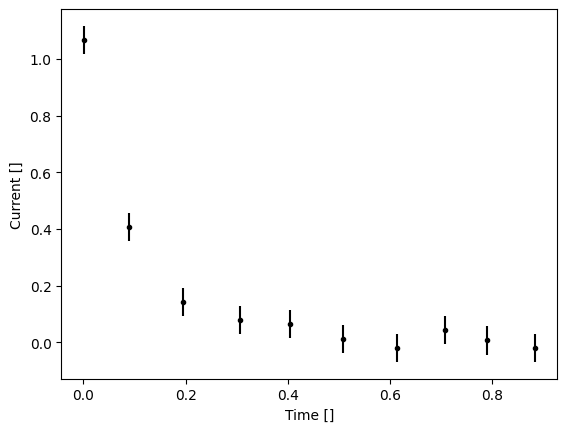

In [491]:
import matplotlib.pyplot as plt

plt.errorbar(
    data_frame['time'], 
    data_frame['current'], 
    data_frame['delta_current'], 
    ls='', 
    marker='.', 
    color='k'
)
plt.xlabel('Time []')
plt.ylabel('Current []')
plt.show()

Nun wollen wir die Messdaten mit Hilfe von `iminuit` fitten. Hierzu müssen wir zunächste zwei Module des packages importieren und eine Funktion für die Entladekurve des Kondensators definieren:

In [1]:
# Diese Zelle nur auf JupyterHub des ZDV ausführen um `iminuit` zu installieren!
# import sys
# import subprocess
# subprocess.check_call([
#     sys.executable, 
#     '-m',
#     'pip',
#     'install',
#     '--proxy',
#     'http://webproxy.zdv.uni-mainz.de:3128',
#     'iminuit'
# ])

In [492]:

from iminuit import Minuit, cost
import numpy as np

def discharge_current(t, I0, R, C):
    return I0 * np.exp(-t/(R*C))

Nun können wir den Fit selbst durchführen. Hierzu muss zuerst mittels dem `cost` Modul eine sogenannte Kostenfunktion erstellt werden. Die Kostenfunktion ist im Grunde unsere $\chi^2$ Funktion

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

welche minimiert werden soll. Dies ist bereits bei `iminuit` für uns vordefiniert. Anschließend können wir die genutzt Kostenfunktion über `Minuit` minimieren lassen. Hierzu müssen wir zunächst geeignete Startwerte für den Minimierungsprozess vorgeben. Diese sollten im Idealfall nicht allzu weit von den wahren Werten entfernt liegen. Wir werden an einem späteren Beispiel noch einmal genauer zeigen, wie man hier vorgehen kann. Um den Minimierungsprozess zu starten muss noch am Ende `migrad()` aufgerufen werden.

In [493]:
# Kostenfunktion:
ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current,
)

# Minimierung
mi = Minuit(ls,        # Kostenfunktion 
            I0=0.9,    # Startwerte
            R=10*10**3, 
            C=10**-6
           )
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 103              │
│ EDM = 2.18e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.4329         -3.448e-9 │
│  R │          -34.4329          2.25e+09 -224.599380820e-3 │
│  C │         -3.448e-9 -224.599380820e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

Wie ihr seht gibt euch minuit euch vier verschiedene Objekte zurück. Für euch am wichtigsten ist die erste Tabelle, welche euch zeigt, ob euer Fit funktioniert hat. Im Allgemeinen gilt sind hier alle Felder grün hat euer Fit funktioniert, gelbe Felder können ein Problem andeuten müssen sie aber nicht und lila Felder bedeuten, dass etwas mit eurem Fit nicht in Ordnung ist. Die Bedeutungen der einzelnen Felder für unseren obigen Fit sind auch nochmal in der nachfolgenden Abbildung einzeln erklärt. Die Bedeutung der meisten Felder werden wir noch im laufe des Kurses kennen lernen. 

<figure class="image">
<img src="images/FitPerformance.png"  alt="{{Fit Performance }}" width=100%>
</figure>

Wie wir unserer Tabelle entnehmen können, gibt es also ein Problem mit unserem Fit. Um besser verstehen zu können, was das Problem sein könnte, wollen wir uns auch noch die anderen Outputs ansehen.

Die zweite Tabelle zeigt uns die bestimmten Werte für die Parameter in der Spalte `Value` und deren Unsicherheiten in der Spalte `Hess error`. Hierbei fällt auf, dass für unseren obigen Fit die Unsicherheiten der Parameter $R$ und $C$ größer sind als die bestimmten Werte selbst. 

Die dritte Tabelle ist die sogennnante **Kovarianzmatrix**. Die Kovarianzmatrix hat als Einträge auf ihrer **Hauptdiagonalen** die **Varianzen der entsprechenden Parameter** auf der **Nebendiagonalen** stehen die **Kovarianzen**. Der Wert in Klammern gibt die **Korrelation** zwischen den entspechenden Parametern an. Sind zwei Parameter stark **korreliert**, wird das entsprechende Feld **blau** dargestellt, bei einer **Antikorrelation** ist das Feld **rot**. 

Die letzte Ausgabe ist ein Plot unserer Messwerte zusammen mit der Fitfunktion basierend auf den Parametern des besten Fits. (Nur für neuere Version von `iminuit`)

Obwohl underser Fit unsere Messdaten gut widerspiegelt, scheint es ein Problem mit der Bestimmung einiger Parameter zu geben. Die große Unsicherheit in $R$ und $C$ deutet an, dass hier das Problem liegt. Um dies zu bestätigen, können wir uns einmal das reduzierte $\chi^2(x, I_0, R, C)$ als Funktion des entsprechenden Parameters von `iminuit` plotten lassen, während wir die anderen Parameter, so wie die x-Werte, konstant lassen. 

Für $I_0$ sieht das entsprechende Profil so aus:

c:\Users\Matthias\.venv\jupyter\lib\site-packages\iminuit\minuit.py:2579: IMinuitWarning: Specified nsigma bound, but error matrix is not accurate
  warnings.warn(


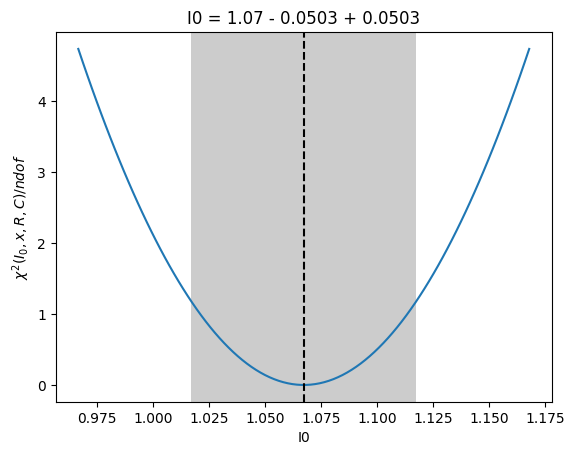

In [494]:
mi.draw_profile('I0')
plt.ylabel('$\chi^2(I_0, x, R, C)/ndof$')
plt.show()

Bei den anderen beiden Parametern ist dies nicht der Fall:

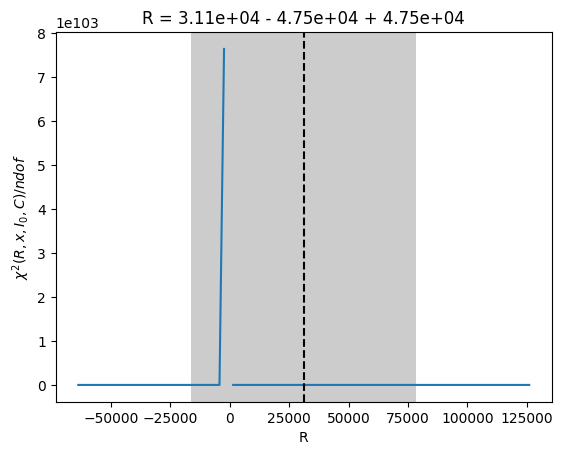

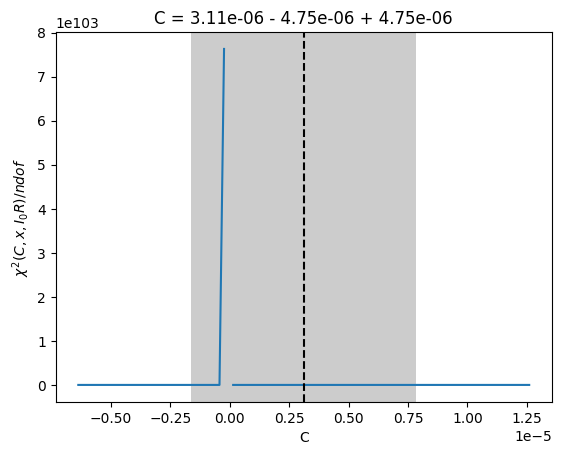

In [495]:
mi.draw_profile('R')
plt.ylabel('$\chi^2(R, x, I_0, C)/ndof$')
plt.show()

mi.draw_profile('C')
plt.ylabel('$\chi^2(C, x, I_0 R)/ndof$')
plt.show()

Das liegt daran, dass $R$ und $C$ vollständig korreliert sind. Reduziert `iminuit` $C$ um ein Faktor zwei, so wird dies dadurch kompensiert, dass das optimale Minimum verlangt, dass $R$ um einen Faktor zwei größer sein muss. Das heißt, es ist ohne weitere Information nicht möglich, $R$ und $C$ näher zu bestimmen, sondern lediglich das Produkt der beiden Größen.

Deshalb müssen wir in unserer Fitfunktion $R$ und $C$ durch die Zeitkonstante $\tau$ ersetzen und schreiben

$$ I = I_0 \exp\{-t/\tau\}$$

mit $\tau = R \cdot C$.

Führen wir nun erneut den Fit durch, so erhalten wir ein fehlerfreies Ergebnis...

In [496]:
#from iminuit import Minuit, cost

def discharge_current2(t, I0, tau):
    return I0 * np.exp(-t/tau)

ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current2
)
mi = Minuit(ls, I0=0.9, tau=0.3)
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.3)      │              Nfcn = 97               │
│ EDM = 1.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ tau  │   0.097   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │       I0      tau │
├─────┼───────────────────┤
│  I0 │  0.00254 -0.22e-3 │
│ tau │ -0.22e-3 0.000116 │
└─────┴───────────────────┘

... und die Werte und Fehler lassen sich über ...

In [497]:
mi.values['I0']

1.0670397937137222

... bzw. ...

In [498]:
mi.errors['I0']

0.050401508019580855

... für jeden Parameter auslesen. Dies lässt sich nun auch nutzen, um unsere Messwerte samt Fit in einem etwas schöneren Plot mit Achsenbeschriftungen darzustellen. Hierbei können wir ausnutzen, dass `iminuit` die Parameter in der Reihenfolge der Argumente unser definierten Fitfunktion speichert.

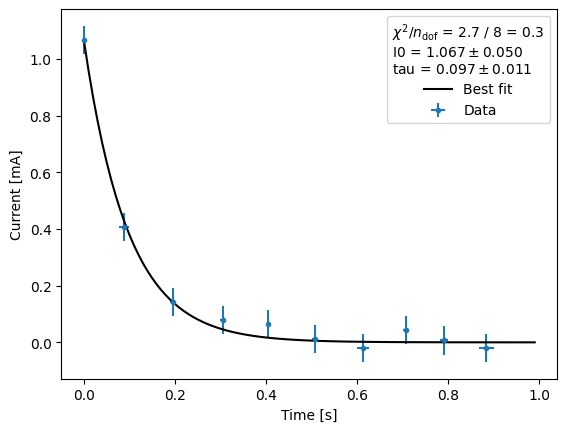

In [499]:
plt.errorbar(data_frame['time'], 
             data_frame['current'], 
             xerr=data_frame['delta_time'], 
             yerr=data_frame['delta_current'], 
             ls='', 
             marker='.',
             label='Data'
            )
x = np.arange(0, 1, 0.01)
plt.plot(x, 
         discharge_current2(x, *mi.values), # Sternchen operator zum entpacken der Werte
         color='k',
         label='Best fit'
        )
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {mi.fval:.1f} / {mi.ndof:.0f} = {mi.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(mi.parameters, mi.values, mi.errors):
    fit_info.append(f"{p} = ${v:.3f} \pm {e:.3f}$")

plt.legend(title="\n".join(fit_info))
plt.ylabel('Current [mA]')
plt.xlabel('Time [s]')
plt.show()

# Mathematisch motivierte Herleitung des $\chi^2$-Fits:

Nach diesen anfänglichen Beispielen wollen wir uns eine semi-mathematische Herleitung des $\chi^2$-Fits angucken um etwas besser zu verstehen, warum diese Methode für uns in der Physik so wichtig ist. In unserem Grundpraktikum haben wir bereits gelernt, dass Messwerte durch Zufallszahlen $x_i$ repräsentiert werden und einer gewissen **Wahrscheinlichkeitsdichtefunktion (probability density function)** $f(x)$ unterliegen.

<figure class="image">
<img src="images/MaterialPythonkurs092018/PorbDensFun.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>


Eine **pdf** gibt an, mit welcher **Wahrscheinlichkeit ein Wert $x_i$** innerhalb eines **infinitesimalen Intervals $\text{d}x_i$** zu finden ist. Des Weiteren gilt, dass die Gesamtwahrscheinlichkeit gegeben ist durch $\int_S f(x) dx = 1$. 

Nun betrachten wir folgendes Beispiel: In unserem Labor messen wir genau drei mal die Raumtemperartur T. Auch hier gilt, dass unsere Messungen der einzelnen $T_i$ einer gewissen **Wahrscheinlichkeitsdichtefunktion** folgen. Betrachten Sie nun das folgende Bild; Welche **Wahrscheinlichkeitsdichtefunktion** passt besser zu den gezeigten Daten und **Warum?**

<figure class="image">
<img src="images/MaterialPythonkurs092018/ProbMaxTemp.png"  alt="{{ Beispiel PDF }}" width=100%>
</figure>

Die rechte Verteilung spiegelt unsere Messdaten besser wider. Dies können wir auch mathematisch ausdrücken. Für $N$ voreinander unabhängige Zufallszahlen bzw. Messpunkte (in unserem Beispiel $N = 3$) ist die Gesamtwahrscheinlichkeit gegeben durch das Produkt der einzelnen Wahrscheinlichkeitsdichten $f(x_i, \theta)$ multipliziert mit dem jeweiligen infinitesimalen Element $dx_i$

$$\prod_{i = 1}^{N} f(x_i,\theta) \  dx_i \text{   für alle } x_i \text{ in } [x_i, x_i + dx_i]$$

wobei $x_i$ in unserem Beispiel den Messpunkten $T_i$ und $f(x_i,\theta)$ unserer Gaussverteilung mit $\theta = (\mu, \sigma)$ entspricht. Sofern unsere Werte gut von der jeweiligen **Wahrscheinlichkeitsdichtefunktion** repräsentiert werden, d.h. wir die richtigen Parameter $\theta$ gewählt haben (wie im rechten oberen Plot), gilt 

$$ \prod_{i = 1}^{N} f(x_i,\theta)  dx_i \ \ \text{ist} \ \textbf{maximal.}$$

Da die einzelnen $dx_i$ von unseren Parametern $\theta$ unabhängig sind, gilt die gleiche Argumentation auch für 

$$ \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N) = \prod_{i = 1}^{N} f(x_i,\theta)$$ 

wobei $\mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)$ die sogenannte **"likelihood"** function darstellt.

Wie kommen wir nun von der **likelihood function** auf unsere **Methode der kleinsten Quadrate** und das Fitten einer Funktion $\lambda(x; \ $**$\phi$**$)$ an die gemessenen Punkte **$(x,y)$**? Dazu brauchen wir noch einen Zwischenschritt. Oftmals ist es einfacher, statt die **likelihood function** zu maximieren, die so genannte **log likelihood function**

$$ \log( \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)) = \sum_{i = 1}^{N} \log(f(x_i,\theta))$$

zu maximieren. Dies ist im Grunde das Gleiche, da der Logarithmus eine monoton-steigende Funktion ist. Auch in unserem Fall der **Methode der kleinsten Quadrate** benötigen wir die **log likelihood function**. 

Stellen Sie sich nun vor, wir haben eine Messung mit $N$ voneinander unabhängigen Messpunkten (x,y). Des Weiteren nehmen wir an, dass alle $x_i$ ohne Fehler sind und dass unsere $y_i$ gaußförmig um einen unbekannten wahren Wert $\lambda_i$ (sprich $\lambda_i$ entspricht dem Erwartungswert $\mu_i$ unserer Gaußverteilung) mit einer bekannten Varianz $\Delta y_i^2$ verteilt sind (Diese Annahme lässt sich mit dem zentralen Grenzwertsatz begründen, so lange der Fehler sich aus der Summe kleiner Fehler zusammensetzt). Die dazugehörige  **likelihood function** ist dann gegeben durch:

$$ \mathcal{L}(y_1 ... y_N; \lambda_1 ... \lambda_N, \Delta y_1 ... \Delta y_N)) = \prod_{i = 1}^{N}\frac{1}{\sqrt{2 \pi \Delta y_i^2}} \cdot \exp \bigg( \frac{ -(y_i - \lambda_i)^2}{2 \cdot \Delta y_i^2}\bigg)$$

Beziehungsweise die **log likelihood function** mit $\lambda_i = \lambda(x_i; \phi)$ ergibt sich zu

$$ \log(\mathcal{L}(y, \theta)) \approx -\frac{1}{2} \sum_{i = 1}^{N}\bigg( \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}\bigg)$$

wobei die konstanten Terme, welche nicht von unserer Funktion $\lambda(x_i; \phi)$ abhängen, vernachlässigt worden sind. Durch den Faktor $-\frac{1}{2}$ ist das Maximieren dieser **log likelihood function** gleich dem Minimieren von

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Diese Funktion ist unsere gesuchte **Methode der kleinsten Quadrate**. Mit ihrer Hilfe kann eine beliebige Funktion $\lambda(x; \phi)$, welche linear in ihren Parametern $\phi$ ist, an unsere Messdaten $(x,y\pm\Delta y)$ gefittet werden. Dabei stellt der Fitprozess selbst lediglich ein Minimierungsproblem dar. Im Folgenden sind unsere Annahmen noch einmal grafisch in einem Beispiel dargestellt.

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Wie ein Algorithmus bei der Minimierung vorgeht, sprengt den Rahmen dieses Vorversuchs. Hier sei auf entsprechende Vorlesungen verwiesen. Aber um einen kleinen Einblick zu erhalten, kann man sich die Werte der Parameter und von $\chi^2$ für jeden Schritt ausgeben lassen. Dazu wird der Parameter `verbose` auf 1 gesetzt.

Man erkannt, dass für jeden Parameter zunächst separat geprüft wird, welche Änderung (größer oder kleiner) die Kostenfunktion minimiert. Danach beginnt die eigentliche Minimierung der Kostenfunktion durch den Algorithmus.

In [500]:
ls = cost.LeastSquares(data_frame['time'], data_frame['current'], data_frame['delta_current'], discharge_current, verbose=1)

mi = Minuit(ls, I0=0.9, R=10*10**3, C=10**-6)
mi.migrad()

(0.9, 10000.0, 1e-06) -> 99.20912665811522
(0.9000900000000001, 10000.0, 1e-06) -> 99.19412063461034
(0.89991, 10000.0, 1e-06) -> 99.22413838602546
(0.9002604809700815, 10000.0, 1e-06) -> 99.16571136645308
(0.8997395190299186, 10000.0, 1e-06) -> 99.25258973321158
(0.9, 10001.0, 1e-06) -> 99.2081333982375
(0.9, 9999.0, 1e-06) -> 99.21012010104333
(0.9, 10010.0, 1e-06) -> 99.19920228362008
(0.9, 9990.0, 1e-06) -> 99.21906933767059
(0.9, 10000.0, 1.0001e-06) -> 99.2081333982375
(0.9, 10000.0, 9.999e-07) -> 99.21012010104333
(0.9, 10000.0, 1.001e-06) -> 99.19920228362008
(0.9, 10000.0, 9.989999999999999e-07) -> 99.21906933767059
(1.1367992341436675, 15426.65629293471, 1.5426656292934658e-06) -> 71.48428998018905
(1.1639942960414291, 16049.877285679564, 1.6049877285679507e-06) -> 69.75101904460233
(1.308096945474447, 19352.234036123315, 1.9352234036123227e-06) -> 64.0373348681763
(1.377047580024234, 20932.354834379075, 2.093235483437897e-06) -> 65.47264288596953
(1.3083067929414927, 19352.2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 87               │
│ EDM = 2.18e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.3309         -3.459e-9 │
│  R │          -34.3309          2.25e+09 -224.592785048e-3 │
│  C │         -3.459e-9 -224.592785048e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

__Zur Erinnerung__: die Methode der kleinsten Quadrate berücksichtigt nur Fehler in `y` aber nicht in `x`. Hierfür sind komplexere Methoden notwendig, die wir hier nicht betrachten wollen.
Ebenfalls wichtig ist, die Statusmeldungen von `iminuit` zu prüfen, d.h. eine <span style="color:yellow"> gelbe </span> Box zeigt an, das man sich Gedanken über das Ergebnis machen sollte (in unserem Fall, dass die Variablen $R$ und $C$ korreliert sind) und eine ,<span style="color:DarkOrchid"> violette </span> Box, dass der Fit nicht konvergiert ist und das Ergebnis nicht verwendet werden kann.

***
--- Split Notebook here ---
***

# Fortgeschrittenes Beispiel
In diesem Abschnitt wollen wir uns mit einem komplexeren Beispiel beschäftigen, um weitere Methoden von `iminuit` kennzulernen.
Hierzu betrachten wir ein Zählexperiment, z.B. ein Teilchendetektor, bei dem ein Energiespektrum aufgenommen wird. Für jedes Energieintervall (Bin) wird die Anzahl der registrierten Ereignisse bestimmt. Hierbei können wir annehmen, dass die Verteilung der gemessenen Anzahl durch eine Poisson-Verteilung beschrieben wird. Dann entspricht der Fehler in jedem Bin gerade $\sqrt n$. 
Dieses Spektrum soll aus zwei gauß-förmigen Peaks über einem exponentiellen Untergrund bestehen und wird mit Hilfe eines Zufallszahlengenerator "erzeugt".

Text(0, 0.5, 'Number of counts per bin')

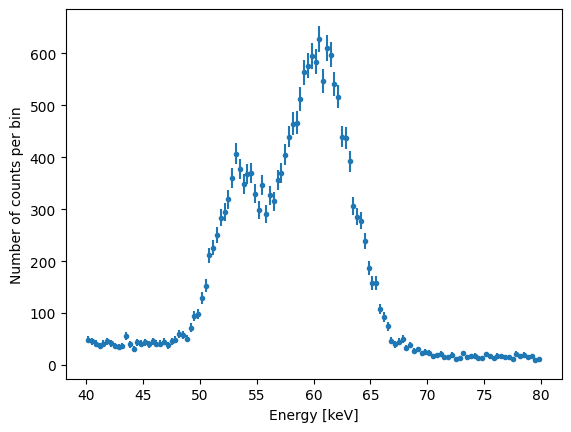

In [501]:
rnd_bkd = np.random.exponential(39.7, 5000)
rnd_bkd += 40

peak1 = np.random.normal(53.3, 2.1, 5000)
peak2 = np.random.normal(60.5, 2.78, 12000)
data = np.concatenate([rnd_bkd, peak1, peak2])

entries, edges = np.histogram(data, bins=120, range=(40, 80))
center = edges[:-1] + np.diff(edges)/2

plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

Zunächst wollen wir das Fitmodel in der Form

$$f(x) = A_1 \cdot \exp \bigg\{\frac{-(x - \mu_1)^2}{2 \cdot \sigma_1^2}\bigg\} + A_2 \cdot \exp \bigg\{\frac{-(x - \mu_2)^2}{2 \cdot \sigma_2^2}\bigg\} + A_3 \exp\{-x/\tau\}$$

definieren. Hier lohnt es sich, erst Funktionen für die einzelnen Komponenten zu definieren und dann das Gesamtmodel. Hierdurch lassen sich später die einzelnen Komponenten besser darstellen.

In [502]:
def peak(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bkg(x, A, tau):
    return A*np.exp(-x/tau)

def fit_model(x, A_p1, A_p2, mu_p1, mu_p2, sigma_p1, sigma_p2, A_bkg, tau_bkg):
    return peak(x, A_p1, mu_p1, sigma_p1) + peak(x, A_p2, mu_p2, sigma_p2) + bkg(x, A_bkg, tau_bkg)

Nun wollen wir wieder die Kostenfunktion und die Minimierungsfunktion definieren. Startwerte können wir anhand unseres Plots ablesen, lediglich $\tau$ lässt sich auf diese Weise nicht gut bestimmen.

In [503]:
ls = cost.LeastSquares(center, entries, np.sqrt(entries), fit_model)

mi = Minuit(ls, 
            A_p1 = 400, 
            A_p2 = 700,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            A_bkg = 100,
            tau_bkg = 10, 
           )
mi.limits['tau_bkg'] = (0, None)

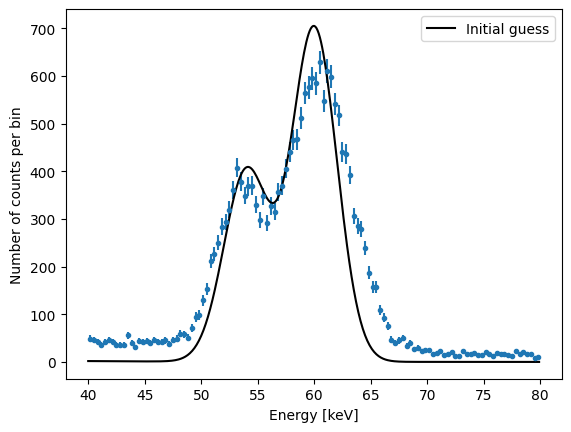

In [504]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()

Unsere Startparameter sind bereits nicht schlecht, aber weichen noch stark von den Daten ab. Bei komplexeren Daten und Fitmodellen lohnt es sich, den Fit schrittweise durchzuführen. Bevor wir uns den beiden Peaks widmen, welche uns eigentlich interessieren, sollten wir versuchen, den Untergrund etwas besser zu beschreiben. Um den Untergrund besser fitten zu können, sollten wir erst den Fitbereich auf einen Energiebereich limitieren, in welchem der Untergrund dominiert. Dem Plot können wir entnehmen, dass dies für alle Werte unterhalb von 45 keV und oberhalb von 70 keV der Fall ist. Im Allgemeinen können wir Wertebereiche in Python mit Hilfe von „Masken“ selektieren. Eine Maske lässt sich wie folgt erstellen:

In [505]:
mask_outside_of_peaks = (center < 45) | (center >= 70)

Die Maske hat hierbei die Selbe länge wie unseren Daten…

In [506]:
len(mask_outside_of_peaks), len(mask_outside_of_peaks)

(120, 120)

… und beinhaltet Wahrheitswerte `True` und `False`, bzw. 1 und 0, mit welchen wir unsere Daten selektieren können:

In [507]:
mask_outside_of_peaks, center[mask_outside_of_peaks]

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([40.16666667, 40.5       , 40.83333333,

Unsere Selektion können wir an unsere Kostenfunktion direkt übergeben.

In [508]:
ls.mask = (center < 45) | (center >= 70)

Nun können wir nochmal unsere Funktion und Messwerte für den ausgewählten Bereich plotten…

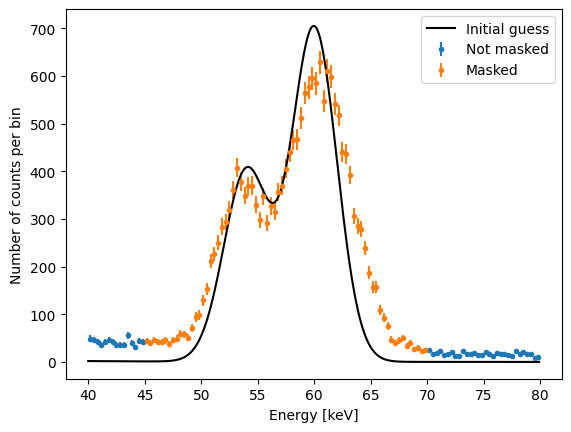

In [509]:
plt.errorbar(center[ls.mask], entries[ls.mask], np.sqrt(entries[ls.mask]), ls='', marker='.', label='Not masked')
plt.errorbar(center[~ls.mask], entries[~ls.mask], np.sqrt(entries[~ls.mask]), ls='', marker='.', label='Masked')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()

Außerdem müssen wir noch alle Fitparameter, welche nicht zum Untergrund beitragen, als konstant festhalten

In [510]:
mi.fixed[:] = True
mi.fixed[['tau_bkg', 'A_bkg']] = False
print (mi.fixed)

<FixedView A_p1=True A_p2=True mu_p1=True mu_p2=True sigma_p1=True sigma_p2=True A_bkg=False tau_bkg=False>


bevor wir die Minmierung starten und das Resultat darstellen.

In [511]:
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 32.8 (χ²/ndof = 0.8)       │              Nfcn = 98               │
│ EDM = 4.43e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    400    │     4     │            │            │         │         │  yes  │
│ 1 │ A_p2     │    700    │     7     │            │            │         │         │  yes  │
│ 2 │ mu_p1    │   54.0    │    0.5    │            │            │         │         │  yes  │
│ 3 │ mu_p2    │   60.0    │    0.6    │            │            │         │         │  yes  │
│ 4 │ sigma_p1 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 5 │ sigma_p2 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 6 │ A_bkg    │    137    │    15     │            │            │         │         │       │
│ 7 │ tau_bkg  │   34.9    │    2.3    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │        0        0        0        0        0        0        0        0 │
│     A_p2 │        0        0        0        0        0        0        0        0 │
│    mu_p1 │        0        0        0        0        0        0        0        0 │
│    mu_p2 │        0        0        0        0        0        0        0        0 │
│ sigma_p1 │        0        0        0        0        0        0        0        0 │
│ sigma_p2 │        0        0        0        0        0        0        0        0 │
│    A_bkg │        0        0        0        0        0        0      229      -33 │
│  tau_bkg │        0        0        0        0        0        0      -33     5.18 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

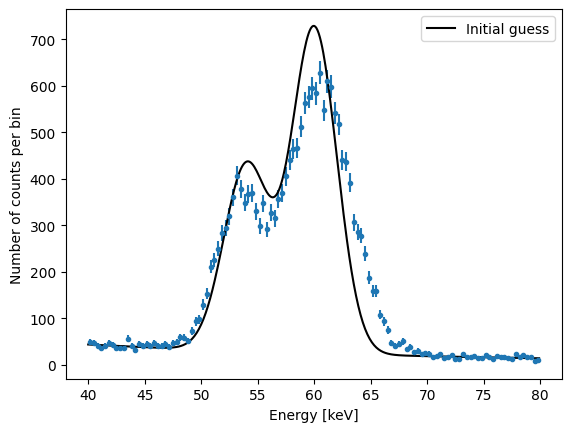

In [512]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()


Das Resultat sieht bereits sehr gut aus. Nun können wir uns den eigentlichen Peaks widmen und starten im Folgenden mit dem kleineren der beiden. Zunächst sollten wir den maskierten Bereich entweder neu definieren oder komplett entfernen.

In [513]:
ls.mask = None

Außerdem können wir dem Plot entnehmen, dass durch den höheren Untergrund unsere Anfangsstartwerte nicht mehr ganz so gut passen. Diese können wir wie folgt aktualisieren:

In [514]:
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3

Nun sollten wir alle Parameter wieder festhalten und nur die Parameter des ersten Peaks freigeben.

In [515]:
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1296 (χ²/ndof = 11.1)      │              Nfcn = 177              │
│ EDM = 2.92e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    348    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    700    │     7     │            │            │         │         │  yes  │
│ 2 │ mu_p1    │   53.51   │   0.04    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.0    │    0.6    │            │            │         │         │  yes  │
│ 4 │ sigma_p1 │   2.085   │   0.034   │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 6 │ A_bkg    │    137    │    15     │            │            │         │         │  yes  │
│ 7 │ tau_bkg  │   34.9    │    2.3    │            │            │    0    │         │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     42.2        0  -0.0042        0  -0.1247        0        0        0 │
│     A_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│    mu_p1 │  -0.0042   0.0000  0.00167   0.0000   0.0004   0.0000   0.0000   0.0000 │
│    mu_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│ sigma_p1 │  -0.1247   0.0000   0.0004   0.0000  0.00118   0.0000   0.0000   0.0000 │
│ sigma_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│    A_bkg │        0        0   0.0000        0   0.0000        0        0        0 │
│  tau_bkg │        0        0   0.0000        0   0.0000        0        0        0 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

Jetzt wiederholen wir das ganze für den zweiten Peak…

In [516]:
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 137 (χ²/ndof = 1.2)        │              Nfcn = 226              │
│ EDM = 1.24e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    348    │     7     │            │            │         │         │  yes  │
│ 1 │ A_p2     │    584    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.51   │   0.04    │            │            │         │         │  yes  │
│ 3 │ mu_p2    │  60.605   │   0.031   │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.085   │   0.034   │            │            │         │         │  yes  │
│ 5 │ sigma_p2 │   2.666   │   0.026   │            │            │         │         │       │
│ 6 │ A_bkg    │    137    │    15     │            │            │         │         │  yes  │
│ 7 │ tau_bkg  │   34.9    │    2.3    │            │            │    0    │         │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────────────┐
│          │      A_p1      A_p2     mu_p1     mu_p2  sigma_p1  sigma_p2     A_bkg   tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────────────┤
│     A_p1 │         0         0         0      0e-3         0         0         0         0 │
│     A_p2 │         0      55.2         0    0.7e-3         0 -110.5e-3         0         0 │
│    mu_p1 │         0         0         0      0e-3         0         0         0         0 │
│    mu_p2 │      0e-3    0.7e-3      0e-3  0.000983      0e-3   -0.2e-3      0e-3      0e-3 │
│ sigma_p1 │         0         0         0      0e-3         0         0         0         0 │
│ sigma_p2 │         0 -110.5e-3         0   -0.2e-3         0  0.000697         0         0 │
│    A_bkg │         0         0         0      0e-3         0         0         0         0 │
│  tau_bkg │         0         0         0      0e-3         0         0         0         0 │
└──────────┴─────────────────────────────────────────────────────────────────────────────────┘

Zum Schluss geben wir wieder alle Parameter frei und führen einen letzten Fit durch. 

In [517]:
mi.fixed[:] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.4 (χ²/ndof = 0.9)      │              Nfcn = 500              │
│ EDM = 4.26e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    317    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    580    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.24   │   0.07    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.43   │   0.05    │            │            │         │         │       │
│ 4 │ sigma_p1 │   1.99    │   0.05    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.80    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    147    │    14     │            │            │         │         │       │
│ 7 │ tau_bkg  │   34.1    │    2.0    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     51.5       10    0.103   0.1006  -0.0808  -0.0969       -0        0 │
│     A_p2 │       10     50.6    0.026   0.0402  -0.0047  -0.1329       -0        0 │
│    mu_p1 │    0.103    0.026  0.00503   0.0027   0.0025  -0.0020   -0.057    0.010 │
│    mu_p2 │   0.1006   0.0402   0.0027  0.00276   0.0018  -0.0015  -0.0515   0.0062 │
│ sigma_p1 │  -0.0808  -0.0047   0.0025   0.0018  0.00297  -0.0012  -0.1413   0.0156 │
│ sigma_p2 │  -0.0969  -0.1329  -0.0020  -0.0015  -0.0012  0.00171   0.0818  -0.0143 │
│    A_bkg │       -0       -0   -0.057  -0.0515  -0.1413   0.0818      209      -28 │
│  tau_bkg │        0        0    0.010   0.0062   0.0156  -0.0143      -28     4.03 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

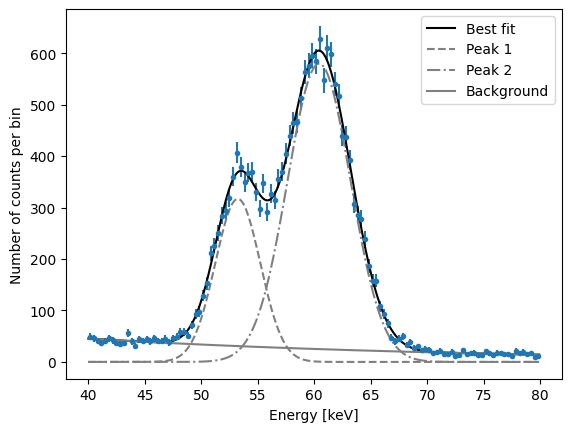

In [518]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Best fit')
plt.plot(x, peak(x, *mi.values['A_p1', 'mu_p1', 'sigma_p1']), color='gray', ls='--', label='Peak 1')
plt.plot(x, peak(x, *mi.values['A_p2', 'mu_p2', 'sigma_p2']), color='gray', ls='-.', label='Peak 2')
plt.plot(x, bkg(x, *mi.values['A_bkg', 'tau_bkg']), color='gray', label='Background')
plt.legend()


Das Ergebnis sieht sehr gut aus. Alle Kacheln sind grün und die Daten scheinen durch die Funktion gut beschrieben zu werden. Natürlich können wir das gesamte Fitverfahren auch etwas kompakter in einer Zelle darstellen:

In [519]:
ls = cost.LeastSquares(center, entries, np.sqrt(entries), fit_model)

mi = Minuit(ls, 
            A_p1 = 800, 
            A_p2 = 1400,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            A_bkg = 100,
            tau_bkg = 10, 
           )
mi.limits['tau_bkg'] = (0, None)
mi.fixed[:] = True
ls.mask = (center < 45) | (center >= 70)
mi.fixed[['tau_bkg', 'A_bkg']] = False
mi.migrad()
ls.mask = None
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()
mi.fixed[:] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.4 (χ²/ndof = 0.9)      │              Nfcn = 530              │
│ EDM = 1.61e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    317    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    580    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.24   │   0.07    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.43   │   0.05    │            │            │         │         │       │
│ 4 │ sigma_p1 │   1.99    │   0.05    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.80    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    147    │    14     │            │            │         │         │       │
│ 7 │ tau_bkg  │   34.1    │    2.0    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     51.5       10    0.103   0.1006  -0.0808  -0.0969       -0        0 │
│     A_p2 │       10     50.6    0.026   0.0402  -0.0047  -0.1329       -0        0 │
│    mu_p1 │    0.103    0.026  0.00503   0.0027   0.0025  -0.0020   -0.057    0.010 │
│    mu_p2 │   0.1006   0.0402   0.0027  0.00276   0.0018  -0.0015  -0.0513   0.0062 │
│ sigma_p1 │  -0.0808  -0.0047   0.0025   0.0018  0.00297  -0.0012  -0.1409   0.0155 │
│ sigma_p2 │  -0.0969  -0.1329  -0.0020  -0.0015  -0.0012  0.00171   0.0816  -0.0142 │
│    A_bkg │       -0       -0   -0.057  -0.0513  -0.1409   0.0816      209      -28 │
│  tau_bkg │        0        0    0.010   0.0062   0.0155  -0.0142      -28     4.01 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

 # Wann fittet ein Fit?
Nach dem wir nun unser Model an unsere Daten angepasst haben, stellt sich die Frage: „Spiegelt unser Model unsere Daten gut wider?“.  Um diese Frage beantworten zu können, gibt es verschiedene Möglichkeiten, welche wir im Folgenden etwas näher betrachten wollen. 
## Fit Residual: 
Schauen wir uns zunächst noch einmal an, wie das Chi-Quadrat definiert ist:
$$ \chi^2 = \sum_i \frac{(y_i - \lambda_i)^2}{\Delta y_i^2} $$
Wir minimieren den Abstand zwischen einem Messwert und unserem Model und gewichten diesen mit den Unsicherheiten unserer Messwerte. Fitresiduen spiegeln genau dies wider. Sie sind definiert als 
$$ \frac{(y_i - \lambda_i)}{\Delta y_i} $$
Für unseren Fit sehen sie wie folgt aus.


Text(0, 0.5, 'Residuals [$\\sigma$]')

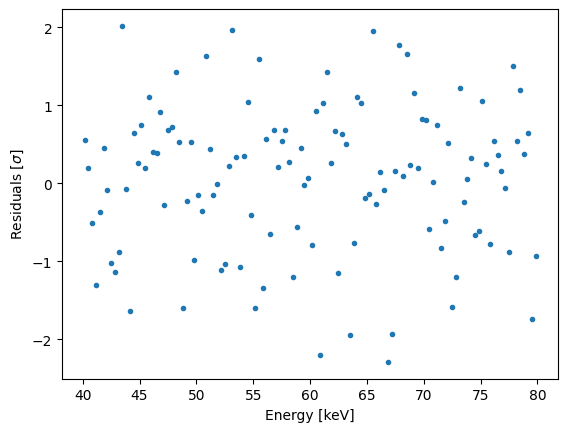

In [520]:
residuals = (entries - fit_model(center, *mi.values))/np.sqrt(entries)

plt.plot(center, residuals, ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Residuals [$\sigma$]')

Als einzelner Plot sind sie noch nicht sehr informativ. Hilfreicher ist es bereits, wenn wir die Residuen zusammen mit unseren Daten und Fitmodel darstellen. 

C:\Users\Matthias\AppData\Local\Temp\ipykernel_67644\53208542.py:7: UserWarning: The figure layout has changed to tight
  fig_fit.tight_layout()


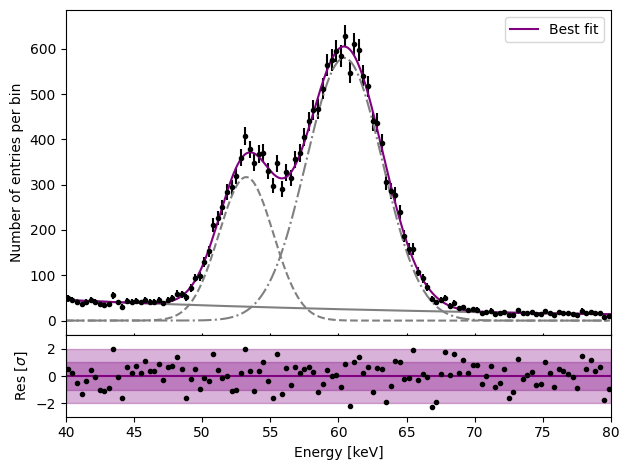

In [521]:
fig_fit = plt.figure(constrained_layout=True)
gs = fig_fit.add_gridspec(5, 5, hspace=0)


main_axis = fig_fit.add_subplot(gs[:4, :])
res_axis = fig_fit.add_subplot(gs[4:, :], sharex=main_axis)
fig_fit.tight_layout()


main_axis.errorbar(center, entries, np.sqrt(entries), ls='', marker='.', color='k')

main_axis.plot(x, peak(x, *mi.values['A_p1', 'mu_p1', 'sigma_p1']), color='gray', ls='--')
main_axis.plot(x, peak(x, *mi.values['A_p2', 'mu_p2', 'sigma_p2']), color='gray', ls='-.')
main_axis.plot(x, bkg(x, *mi.values['A_bkg', 'tau_bkg']), color='gray')

x = np.arange(40, 80, 0.1)
main_axis.plot(x, fit_model(x, *mi.values), color='purple', label='Best fit')
main_axis.legend()
main_axis.set_ylabel('Number of entries per bin')
main_axis.xaxis.set_tick_params(direction='inout')
main_axis.tick_params(axis='x', labelcolor=(0, 0, 0, 0))
main_axis.set_xlim(40, 80)

res_axis.set_xlabel('Energy [keV]')
res_axis.set_ylabel('Res [$\sigma$]')
res_axis.set_ylim(-3, 3)
res_axis.set_yticks([-2, 0,  2])
res_axis.fill_between((40, 80), -1, 1, alpha=0.3, color='purple')
res_axis.fill_between((40, 80), -2, 2, alpha=0.3, color='purple')
res_axis.axhline(0, color='purple')
res_axis.set_xlim(40, 80)
res_axis.plot(center, 
              residuals,
              color='k', marker='.', ls=''
             )
plt.tight_layout()

Sofern unser Fitmodel unsere Daten gut beschreibt, erwarten wir, dass die Residuen sich Gaußförmig zufällig um den Wert 0 herum verteilen. Dies folgt direkt aus der Annahme, dass sich die Unsicherheiten unserer Messwerte durch eine Gaußverteilung darstellen lassen. Dies können wir direkt überprüfen, sofern wir unsere Residuen in ein Histogramm eintragen. 

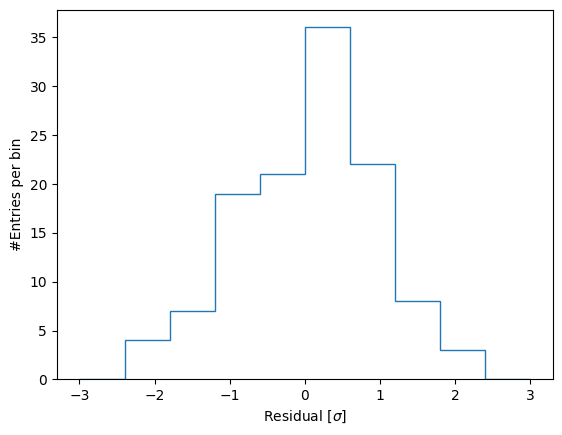

In [522]:
plt.hist(residuals, bins=10, range=(-3, 3), histtype='step')
plt.xlabel('Residual [$\sigma$]')
plt.ylabel('#Entries per bin')
plt.show()

Bzw. den Anteil an Residuen berechnen, welcher innerhalb der 1 $\sigma$ Umgebung liegt.

In [523]:
np.sum(np.abs(residuals) < 1)/len(residuals)

0.6833333333333333

Zeigen unsere Residuen eine Struktur oder ein systematisches Verhalten, deutet dies auf einen ungenauen Fit oder ein falsches Fitmodel hin. Dies ist im Folgenden gezeigt. 

C:\Users\Matthias\AppData\Local\Temp\ipykernel_67644\2321973434.py:8: UserWarning: The figure layout has changed to tight
  fig_fit.tight_layout()


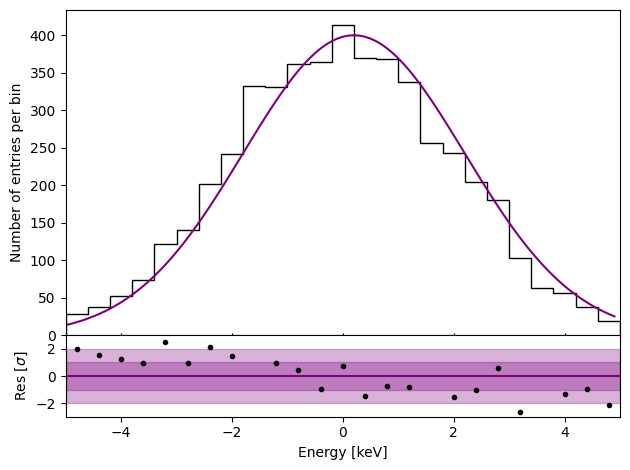

In [524]:
pseudo_data = np.random.normal(0, 2, 5000)

fig_fit = plt.figure(constrained_layout=True)
gs = fig_fit.add_gridspec(5, 5, hspace=0)

main_axis = fig_fit.add_subplot(gs[:4, :])
res_axis = fig_fit.add_subplot(gs[4:, :], sharex=main_axis)
fig_fit.tight_layout()

entries1, edges1, _ = main_axis.hist(pseudo_data, bins=25, range=(-5,5), histtype='step', color='k')
center1 = edges1[:-1] + np.diff(edges1)/2

residuals1 = (entries1 - peak(center1, 400, 0.2, 2))/np.sqrt(entries1)

x = np.arange(-5, 5, 0.1)

main_axis.plot(x, peak(x, 400, 0.2, 2), color='purple')
main_axis.set_ylabel('Number of entries per bin')
main_axis.xaxis.set_tick_params(direction='inout')
main_axis.tick_params(axis='x', labelcolor=(0, 0, 0, 0))
main_axis.set_xlim(-5, 5)

res_axis.set_xlabel('Energy [keV]')
res_axis.set_ylabel('Res [$\sigma$]')
res_axis.set_ylim(-3, 3)
res_axis.set_yticks([-2, 0,  2])
res_axis.fill_between((-5, 5), -1, 1, alpha=0.3, color='purple')
res_axis.fill_between((-5, 5), -2, 2, alpha=0.3, color='purple')
res_axis.axhline(0, color='purple')
res_axis.set_xlim(-5, 5)
res_axis.plot(center1, 
              residuals1,
              color='k', marker='.', ls=''
             )
plt.tight_layout()

Zusätzlich zu den Fit-Residuen bietet das $\chi^2$ selbst einen Weg, um die „goodness-of-fit“ unseres Model bestimmen zu können ...

### $\chi^2$:

Wie gut fittet unsere obige Funktion unsere Messdaten? Sehr gut? Gut? Befriedigend? Oder doch eher schlecht?   Wäre es nicht gut, ein Maß für die Güte des Fits zu haben? Wie könnte ein solches Maß aussehen?

Sie haben das entscheidende Kriterium bereits kennengelernt: bei der Methode der kleinsten Quadrate geht es darum, das  $\chi^2$ zu minimieren. Gucken wir uns hierzu erst noch einmal an, wie sich das $\chi^2$ berechnet:

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Bei der Minimierung werden dabei Werte mit geringerer Unsicherheit bevorzugt, d.h. stärker gewichtet (s. Bild unten).

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=80%>
</figure>

Damit man für einen gegebenen Datensatz nicht hunderte von verschiedenen Funktionen durchprobieren muss, gibt es für das $\chi^2$ eine allgemeine Faustregel, welche den berechneten $\chi^2$-Wert mit der Anzahl unserer Freiheitsgrade vergleicht. Die Anzahl an Freiheitsgrade ist gemeinhin gegeben als *Anzahl der Messwerte - Anzahl der Funktionsparameter* ($m - n$).

1. Sofern  $\chi^2/\text{ndof} >> 1$: sollte die Hypothese bzw. die Fitfunktion angezweifelt werden. Sie beschreibt in diesem Fall die Messdaten nur unzureichend. (Bzw. sollte $\chi^2/\text{ndof} > 1$ kann dies auch bedeuten, dass die Unsicherheiten unterschätzt sind)
2. Sofern $\chi^2/\text{ndof} \approx 1$: beschreibt die Hypothese bzw. die Fitfunktion die Daten wie erwartet und wird nicht abgelehnt. 
3. Falls $\chi^2/\text{ndof} << 1$ beschreibt die Hypothese bzw. die Fitfunktion die Daten wesentlich besser als erwartet. In diesem Fall heißt das nicht automatisch, dass unsere Hypothese falsch ist, aber man sollte überprüfen, ob die gemessenen Fehler nicht überschätzt worden sind (oder eine Korrelation zwischen den Messfehlern vorliegt).  

Sofern Sie eine Arbeit schreiben und Ihre **Goodness-of-the-Fit** ($\chi^2/\text{ndof}$) angeben wollen, so geben Sie immer beides an, das $\chi^2$ und die Anzahl an Freiheitsgraden *ndof*. Beide Werte getrennt haben einen größeren Informationsgehalt als der resultierende Quotient (Genaueres lernen Sie z.B. in der Vorlesung *Statistik, Datenanalyse und Simulationen* im Master).

Sehen wir uns hierzu nochmal unseren Doppelpeakfit etwas genauer an. `iminuit` berechnet hier für uns bereits das reduzierete $\chi^2$.

In [525]:
mi

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.4 (χ²/ndof = 0.9)      │              Nfcn = 530              │
│ EDM = 1.61e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    317    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    580    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.24   │   0.07    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.43   │   0.05    │            │            │         │         │       │
│ 4 │ sigma_p1 │   1.99    │   0.05    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.80    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    147    │    14     │            │            │         │         │       │
│ 7 │ tau_bkg  │   34.1    │    2.0    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     51.5       10    0.103   0.1006  -0.0808  -0.0969       -0        0 │
│     A_p2 │       10     50.6    0.026   0.0402  -0.0047  -0.1329       -0        0 │
│    mu_p1 │    0.103    0.026  0.00503   0.0027   0.0025  -0.0020   -0.057    0.010 │
│    mu_p2 │   0.1006   0.0402   0.0027  0.00276   0.0018  -0.0015  -0.0513   0.0062 │
│ sigma_p1 │  -0.0808  -0.0047   0.0025   0.0018  0.00297  -0.0012  -0.1409   0.0155 │
│ sigma_p2 │  -0.0969  -0.1329  -0.0020  -0.0015  -0.0012  0.00171   0.0816  -0.0142 │
│    A_bkg │       -0       -0   -0.057  -0.0513  -0.1409   0.0816      209      -28 │
│  tau_bkg │        0        0    0.010   0.0062   0.0155  -0.0142      -28     4.01 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

Eine eigene Abschätzung für das $\chi^2$ ergibt:

In [526]:
def chi_square_ndof(x_values, y_values, dy_values, fit_model, minuit):
    ndof = len(x_values) - len(minuit.values)
    chi2 = np.sum((y_values - fit_model(x_values, *minuit.values))**2/dy_values**2)
    return chi2, ndof


chi_square, ndof = chi_square_ndof(center, entries, np.sqrt(entries), fit_model, mi)
print(chi_square, ndof, chi_square/ndof)

106.36771764289108 112 0.9497117646686704


### Hypothesen-Test mittels $\chi^2$
Wie schon im vorherigen Abschnitt erwähnt, kann man das $\chi^2$ auch dazu verwenden, die Gültigkeit des gewählten Models zu prüfen.
Hierzu schauen wir uns die $\chi^2$-Verteilung an. Der einzige freie Parameter ist die Anzahl der Freiheitsgrade. Die Anzahl der Freiheitsgrade ist auch gleichzeitig der Erwartungswert der $\chi^2$-Verteilung. In unserem Beispiel oben ist die Anzahl der Freiheitsgrade 112 und die entsprechende Verteilung sieht wie folgt aus...

In [527]:
from scipy.stats import chi2
# chi_distribution = lambda x, ndof: chi2.pdf(x, ndof)

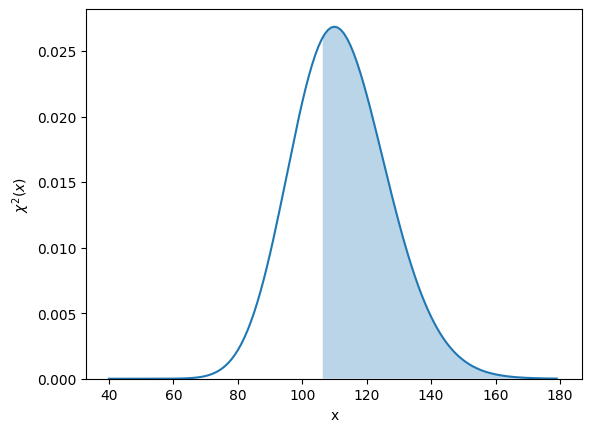

In [528]:
x = np.arange(40., 180.)
# plt.plot(x, chi_distribution(x, 112))
plt.plot(x,chi2.pdf(x, 112))
x = np.arange(chi_square, 180, 0.1)
plt.fill_between(x, chi2.pdf(x, 112), alpha=0.3)
plt.ylim(0, None)
plt.xlabel('x')
plt.ylabel('$\chi^2(x)$')
plt.show()

Der erste Schritt für den Hypothesen-Test ist die Berechnung des $P$-Werts
$$ P = \int_{\chi^2}^{\infty} f(z,n_d)dz $$
wobei $f(z,n_d)$ die $\chi^2$-Verteilung und $n_d$ die Anzahl der Freiheitsgrade ist.
Im Bild oben entspricht dies der ausgefüllten Fläche.

Die praktische Berechnung erfolgt mittels der kumulativen Verteilungsfunktion via
$$ P = 1 - \chi^2_{CDF}(x, n_d) $$
wobei für $x$ das im Fit bestimmte $\chi^2$ eingesetzt wird. Die praktische Bedeutung des $P$-Werts ist die Wahrscheinlichkeit bei einer Wiederholung des Experiments in größeres $\chi^2$ zu erhalten, wenn unser Model die Daten richtig beschreibt und die ermittelten Fitparameter den wahren Werten entsprechen.

In [529]:
p_value = lambda x, ndof: 1 - chi2.cdf(x, ndof)
p_value(chi_square, ndof), p_value(chi_square*10, ndof*10), p_value(ndof, ndof)

(0.6323451110506132, 0.884238547608047, 0.48222800598351057)

Kehren wir zu unserem Doppelpeak-Spektrum zurück und änderen das Fitmodell, indem wir statt eines exponentiellen einen konstanten Untergrund annehmen.

In [530]:
def alternative_fit_model(x, A_p1, A_p2, mu_p1, mu_p2, sigma_p1, sigma_p2, c):
    return peak(x, A_p1, mu_p1, sigma_p1) + peak(x, A_p2, mu_p2, sigma_p2) + c

ls = cost.LeastSquares(center, entries, np.sqrt(entries), alternative_fit_model)

mi = Minuit(ls, 
            A_p1 = 800, 
            A_p2 = 1400,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            c = 100, 
           )
mi.limits['c'] = (0, None)
mi.fixed[:] = True
ls.mask = (center < 45) | (center >= 70)
mi.fixed[['c']] = False
mi.migrad()
ls.mask = None
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()
mi.fixed[:] = False
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 369.6 (χ²/ndof = 3.3)      │              Nfcn = 415              │
│ EDM = 5.63e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    319    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    583    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.31   │   0.08    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.52   │   0.06    │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.23    │   0.07    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.72    │   0.04    │            │            │         │         │       │
│ 6 │ c        │   21.4    │    0.6    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2        c │
├──────────┼────────────────────────────────────────────────────────────────┤
│     A_p1 │     47.8       10    0.096   0.0895   -0.108  -0.0881      0.1 │
│     A_p2 │       10     52.4   -0.036  -0.0034   -0.064  -0.1062      0.0 │
│    mu_p1 │    0.096   -0.036  0.00694   0.0038    0.004  -0.0025    0.002 │
│    mu_p2 │   0.0895  -0.0034   0.0038  0.00333   0.0027  -0.0017  -0.0018 │
│ sigma_p1 │   -0.108   -0.064    0.004   0.0027  0.00444  -0.0016   -0.005 │
│ sigma_p2 │  -0.0881  -0.1062  -0.0025  -0.0017  -0.0016  0.00179  -0.0033 │
│        c │      0.1      0.0    0.002  -0.0018   -0.005  -0.0033     0.39 │
└──────────┴────────────────────────────────────────────────────────────────┘

Diese Änderung ist gering und der Fit scheint die Daten weiterhin zu beschreiben. Allerdings gibt bei kleinen Energien eine deutlich sichtbare Diskrepanz. Dies zeigt sich auch in einem größeren $\chi^2$-Wert. Wie wirkt sich dies auf den $P$-Wert aus?

In [478]:
chi_square, ndof = chi_square_ndof(center, entries, np.sqrt(entries), alternative_fit_model, mi)
print(chi_square, ndof, chi_square/ndof)

329.01941626278426 113 2.911676250113135


In [479]:
p_value = lambda x, ndof: 1 - chi2.cdf(x, ndof)
print(chi_square, ndof)
p_value(chi_square, ndof)

329.01941626278426 113


0.0

Der Fit ist offensichtlich viel schlechter und der $P$-Wert liegt nahe bei null, so dass man dieses Model ausschließen sollte.

Was aber, wenn die Änderung nicht so dramatisch ist? Ist ein $P$-Wert von 0,4 besser als 0,2? Nein, das kann man so nicht beantworten. Aber für einen Hypothesen-Test sollten man vorher eine Schwelle festlegen für die Akzeptanz oder Ablehnung des Models.

Wie ein solcher Hypothesen-Test aussehen kann, wollen wir im Folgenden betrachten. Hierbei benutzen wir
1. ein korrektes Model (Normalverteilung),
2. ein korrektes Model mit überschätztem Fehler (10% größer),
3. und ein falsches Model (Lorentzverteilung)

In [264]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

Den Fit der drei Modelle und die Bestimmung des entsprechenden $P$-Werts wiederholen wir 5000-mal um eine ausreichende Statistik zu erhalten.

In [ ]:
# Diese Zelle nur auf JupyterHub des ZDV ausführen um `tqdm` zu installieren!
# import sys
# import subprocess
# subprocess.check_call([
#     sys.executable, 
#     '-m',
#     'pip',
#     'install',
#     '--proxy',
#     'http://webproxy.zdv.uni-mainz.de:3128',
#     'tqdm'
# ])

In [531]:
from tqdm.notebook import tqdm

res_good_model = []
res_overfitting = []
res_wrong_model = []

def peak(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)


for i in tqdm(range(5000)):
    
    test_data = np.random.normal(0, 2, 5000)
    
    entries, edges = np.histogram(test_data, bins=25, range=(-4,4))
    center = edges[:-1] + np.diff(edges)/2
    
    ls = cost.LeastSquares(center, entries, np.sqrt(entries), peak)
    mi = Minuit(ls, 
                mu=0.1,
                sigma=1.5,
                A = 300
               )
    mi.migrad()
    
    chi, ndof = chi_square_ndof(center, entries, np.sqrt(entries), peak, mi)
    res_good_model.append(p_value(chi, ndof))


    ls = cost.LeastSquares(center, entries, np.sqrt(entries)*1.1, peak)
    mi = Minuit(ls, 
                mu=0.1,
                sigma=1.5,
                A = 300
               )
    mi.migrad()
    
    chi, ndof = chi_square_ndof(center, entries, np.sqrt(entries)*1.1, peak, mi)
    res_overfitting.append(p_value(chi, ndof))


    ls = cost.LeastSquares(center, entries, np.sqrt(entries), lorentzian)
    mi = Minuit(ls, 
                x0=0,
                gam=3,
                a = 300,
               )
    mi.migrad()
    
    chi, ndof = chi_square_ndof(center, entries, np.sqrt(entries), lorentzian, mi)
    res_wrong_model.append(p_value(chi, ndof))

res_wrong_model = np.array(res_wrong_model)
res_good_model = np.array(res_good_model)
res_overfit_model = np.array(res_overfitting)

  0%|          | 0/5000 [00:00<?, ?it/s]

Die Schwelle des $P$-Werts für den Hypothesen-Test setzen wir auf 0,1, d.h. Ergebnisse mit eine, $P$-Wert $<$ 0,1 werden verworfen, alle anderen akzeptiert.

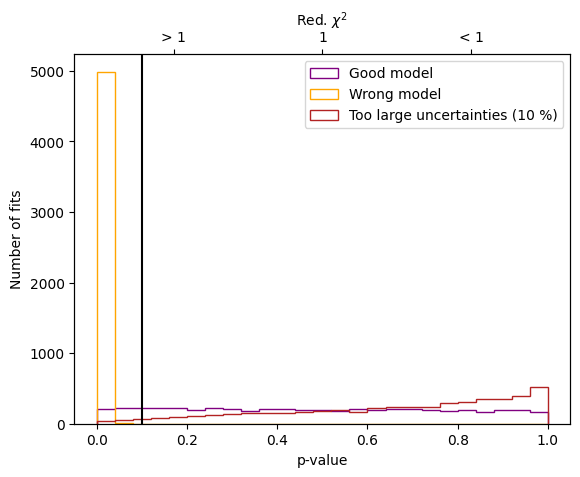

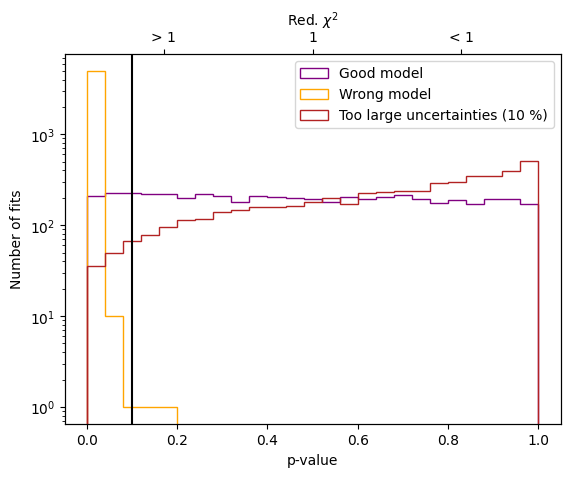

In [266]:
fig, axes = plt.subplots()
axes.hist(res_good_model, bins=25, range=(0, 1), histtype='step', color='purple', label='Good model')
axes.hist(res_wrong_model, bins=25, range=(0, 1), histtype='step', color='orange', label='Wrong model')
axes.hist(res_overfitting, bins=25, range=(0, 1), histtype='step', color='firebrick', label='Too large uncertainties (10 %)')
axes.set_xlabel('p-value')
axes.set_ylabel('Number of fits')
axes.legend()
axes.axvline(0.1, color='k')
axes2 = plt.twiny()
axes2.set_xlabel('Red. $\chi^2$')
axes2.set_xticks([0.2, 0.5, 0.8], ['> 1', '1', '< 1'])
plt.show()

axes.set_yscale('log')
fig

Wie man sieht, wird das falsche Modell nahezu immer verworfen während das richtige Modell meistens nicht verworfen wird. Das Modell mit dem überschätzten Fehler wird sogar häufiger akzeptiert, so dass man hier keine Unterscheidung vornehmen kann.

In [532]:
print(f'Fraction of wrong model fits rejected: {np.sum(res_wrong_model<0.1)/len(res_wrong_model):.4f}')
print(f'Fraction of good model fits rejected: {np.sum(res_good_model<0.1)/len(res_good_model):.4f}')
print(f'Fraction of overfitting model fits rejected: {np.sum(res_overfit_model<0.1)/len(res_overfit_model):.4f}')

Fraction of wrong model fits rejected: 0.9998
Fraction of good model fits rejected: 0.1002
Fraction of overfitting model fits rejected: 0.0250


Wenn man das Limit für den Hypothesen-Test auf 0,05 festlegt, ändern die Ergebnisse wie folgt:

In [533]:
print(f'Fraction of wrong model fits rejected: {np.sum(res_wrong_model<0.05)/len(res_wrong_model):.4f}')
print(f'Fraction of good model fits rejected: {np.sum(res_good_model<0.05)/len(res_good_model):.4f}')
print(f'Fraction of overfitting model fits rejected: {np.sum(res_overfit_model<0.05)/len(res_overfit_model):.4f}')

Fraction of wrong model fits rejected: 0.9986
Fraction of good model fits rejected: 0.0534
Fraction of overfitting model fits rejected: 0.0114


Der Hypothesen-Test kann das Modell nicht ablehnen, statt es zu bestätigen!